In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [3]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['archive (1).zip']), 'r') as zip_ref:
    zip_ref.extractall()


In [4]:
import os
os.listdir('ml-100k')



['u.occupation',
 'allbut.pl',
 'u4.base',
 'ua.test',
 'u5.base',
 'ub.test',
 'u2.base',
 'u.info',
 'ub.base',
 'ua.base',
 'u3.test',
 'u.data',
 'u1.test',
 'u.user',
 'u3.base',
 'mku.sh',
 'u.item',
 'u2.test',
 'u1.base',
 'u.genre',
 'README',
 'u4.test',
 'u5.test']

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading ratings data
ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_columns)


movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
                'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies_df = pd.read_csv('ml-100k/u.item', sep='|', names=movie_columns, encoding='latin-1')


user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users_df = pd.read_csv('ml-100k/u.user', sep='|', names=user_columns)

# Displaying the first few rows of each dataframe
print("Ratings:")
print(ratings_df.head(), "\n")

print("Movies:")
print(movies_df[['movie_id', 'title', 'release_date']].head(), "\n")

print("Users:")
print(users_df.head())

Ratings:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596 

Movies:
   movie_id              title release_date
0         1   Toy Story (1995)  01-Jan-1995
1         2   GoldenEye (1995)  01-Jan-1995
2         3  Four Rooms (1995)  01-Jan-1995
3         4  Get Shorty (1995)  01-Jan-1995
4         5     Copycat (1995)  01-Jan-1995 

Users:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [7]:
# Merging ratings with movie details
ratings_movies_df = pd.merge(ratings_df, movies_df, on='movie_id')
ratings_movies_df.head()


,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
full_df = pd.merge(ratings_movies_df, users_df, on='user_id')
full_df.head()


,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,47,M,educator,55113


In [36]:
full_df.drop(columns=['video_release_date', 'IMDb_URL', 'zip_code'], axis=1, inplace=True)

In [37]:

full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  int64 
 1   movie_id      100000 non-null  int64 
 2   rating        100000 non-null  int64 
 3   timestamp     100000 non-null  int64 
 4   title         100000 non-null  object
 5   release_date  99991 non-null   object
 6   unknown       100000 non-null  int64 
 7   Action        100000 non-null  int64 
 8   Adventure     100000 non-null  int64 
 9   Animation     100000 non-null  int64 
 10  Children's    100000 non-null  int64 
 11  Comedy        100000 non-null  int64 
 12  Crime         100000 non-null  int64 
 13  Documentary   100000 non-null  int64 
 14  Drama         100000 non-null  int64 
 15  Fantasy       100000 non-null  int64 
 16  Film-Noir     100000 non-null  int64 
 17  Horror        100000 non-null  int64 
 18  Musical       100000 non-

In [38]:
full_df.describe(include='all')

,user_id,movie_id,rating,timestamp,title,release_date,unknown,Action,Adventure,Animation,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000,99991,100000.0000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000
unique,NaN,NaN,NaN,NaN,1664,240,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,21
top,NaN,NaN,NaN,NaN,Star Wars (1977),01-Jan-1995,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,student
freq,NaN,NaN,NaN,NaN,583,9932,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74260,21957
mean,462.48475,425.530130,3.529860,8.835289e+08,NaN,NaN,0.0001,0.255890,0.137530,0.036050,...,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,32.969850,NaN,NaN
std,266.61442,330.798356,1.125674,5.343856e+06,NaN,NaN,0.0100,0.436362,0.344408,0.186416,...,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,11.562623,NaN,NaN
min,1.00000,1.000000,1.000000,8.747247e+08,NaN,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,7.000000,NaN,NaN
25%,254.00000,175.000000,3.000000,8.794487e+08,NaN,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,24.000000,NaN,NaN
50%,447.00000,322.000000,4.000000,8.828269e+08,NaN,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,30.000000,NaN,NaN
75%,682.00000,631.000000,4.000000,8.882600e+08,NaN,NaN,0.0000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,40.000000,NaN,NaN


In [45]:
full_df.dropna(subset=['release_date'], inplace=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99991 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       99991 non-null  int64 
 1   movie_id      99991 non-null  int64 
 2   rating        99991 non-null  int64 
 3   timestamp     99991 non-null  int64 
 4   title         99991 non-null  object
 5   release_date  99991 non-null  object
 6   unknown       99991 non-null  int64 
 7   Action        99991 non-null  int64 
 8   Adventure     99991 non-null  int64 
 9   Animation     99991 non-null  int64 
 10  Children's    99991 non-null  int64 
 11  Comedy        99991 non-null  int64 
 12  Crime         99991 non-null  int64 
 13  Documentary   99991 non-null  int64 
 14  Drama         99991 non-null  int64 
 15  Fantasy       99991 non-null  int64 
 16  Film-Noir     99991 non-null  int64 
 17  Horror        99991 non-null  int64 
 18  Musical       99991 non-null  int64 
 19  Mystery  

<ipython-input-46-3c57cedb0f73>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=full_df, x='rating', palette='viridis')


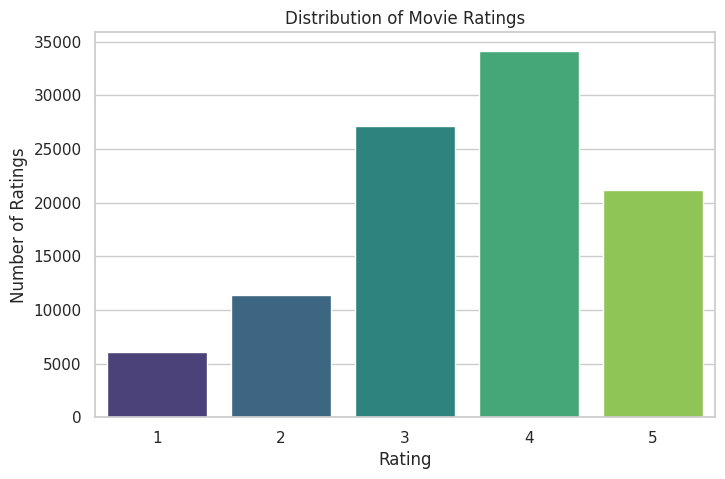

In [46]:
#Setiing  style
sns.set(style="whitegrid")

#Ploting rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=full_df, x='rating', palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

<ipython-input-47-7097390921ae>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


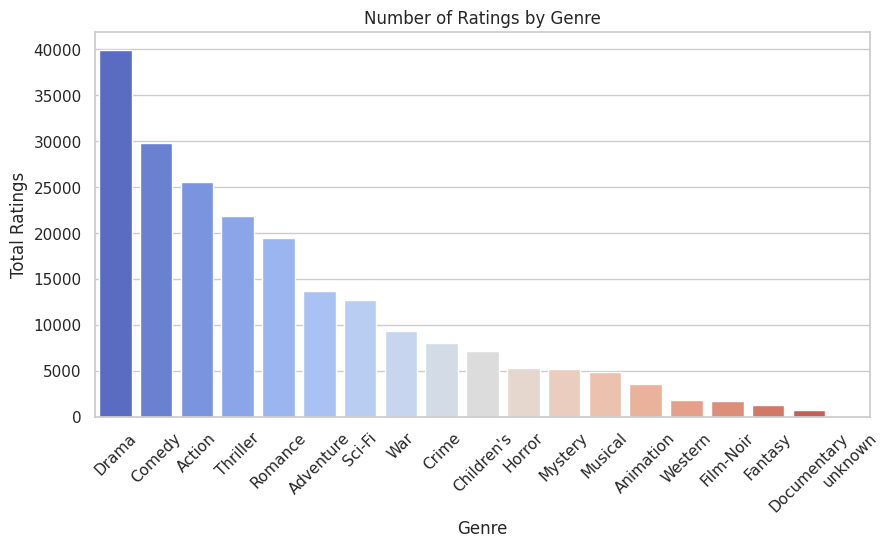

In [47]:
genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

#Calculating genre totals
genre_counts = full_df[genre_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Number of Ratings by Genre')
plt.ylabel('Total Ratings')
plt.xlabel('Genre')
plt.show()


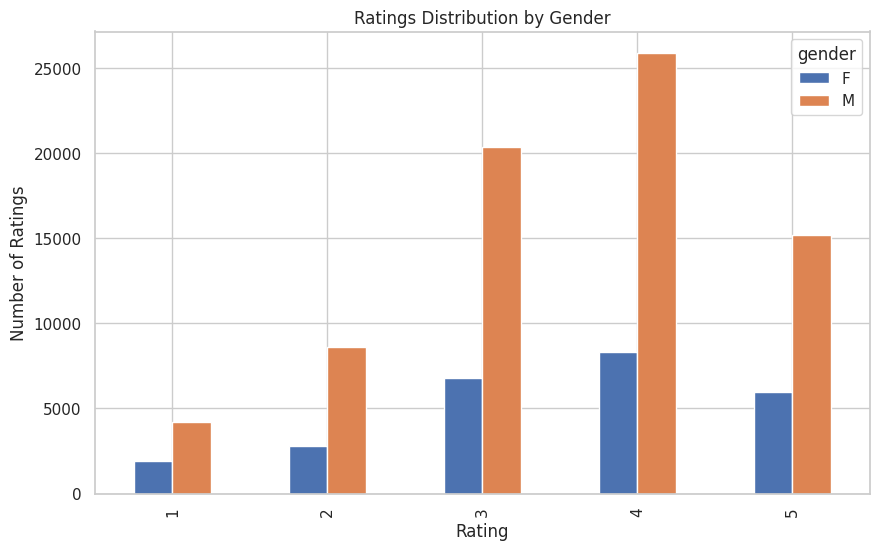

In [48]:
#Grouping by gender and rating
gender_rating = full_df.groupby(['gender', 'rating']).size().unstack()

gender_rating.T.plot(kind='bar', figsize=(10, 6))
plt.title('Ratings Distribution by Gender')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


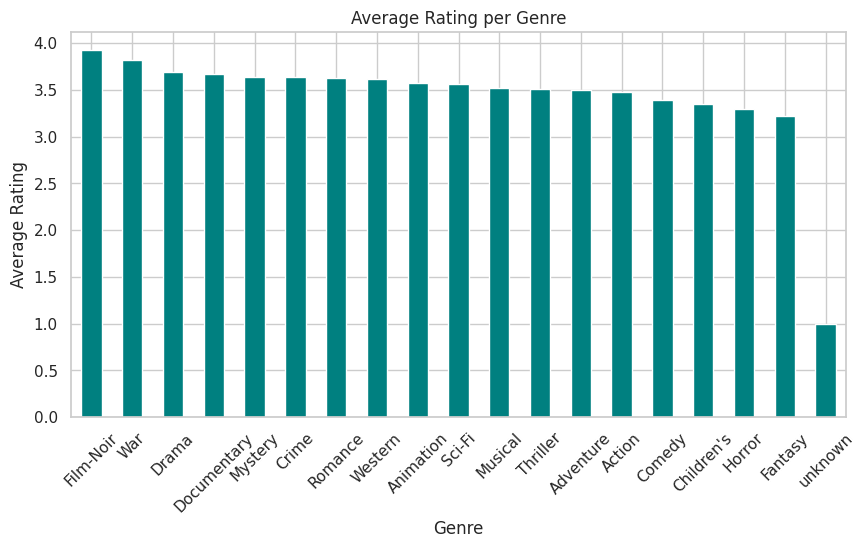

In [49]:
###Average rating for each genre?

#Creating a copy to avoid modifying original
genre_ratings = full_df.copy()

#Multiplying rating by each genre column to get "weighted" rating
for genre in genre_cols:
    genre_ratings[genre] = genre_ratings[genre] * genre_ratings['rating']

#Average rating per genre
avg_genre_rating = genre_ratings[genre_cols].sum() / full_df[genre_cols].sum()

plt.figure(figsize=(10, 5))
avg_genre_rating.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Average Rating per Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

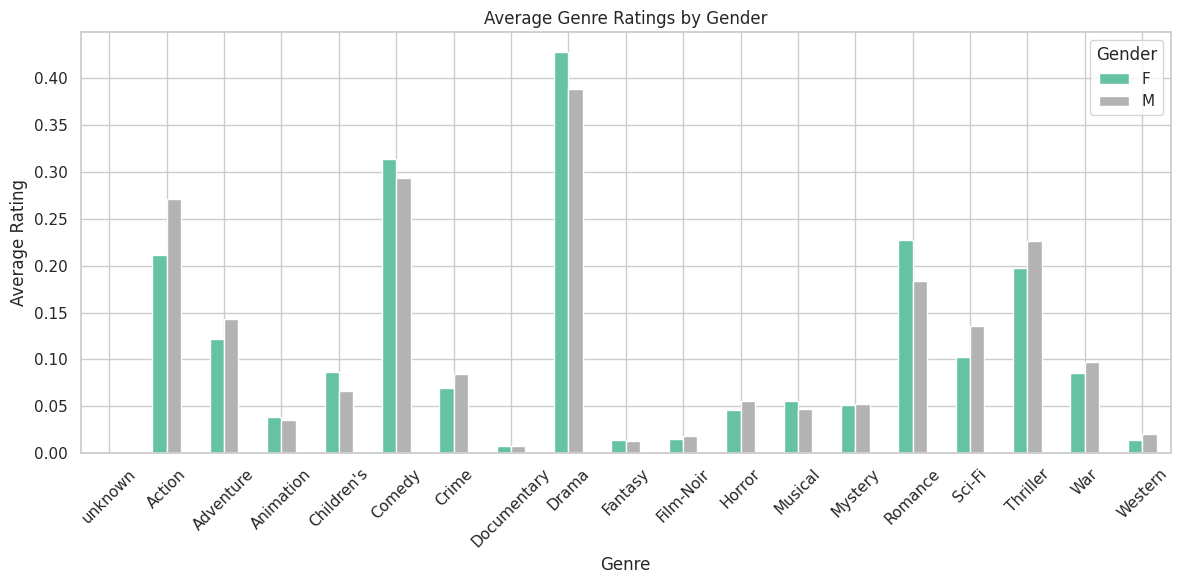

In [51]:
###Do male and female users rate genres differently?


#Grouping by gender and calculating average rating for each genre
avg_rating_by_gender = full_df.groupby('gender')[genre_cols].mean().T

#Comparison plot
plt.figure(figsize=(12, 6))
avg_rating_by_gender.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Average Genre Ratings by Gender')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [52]:
###Do age groups prefer different genres or give different ratings?


#Define age bins and labels
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

#Creating a new column 'age_group'
full_df['age_group'] = pd.cut(full_df['age'], bins=bins, labels=labels)


<ipython-input-53-6698c483c9b5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_age = full_df.groupby('age_group')[genre_cols].mean().T


<Figure size 1400x600 with 0 Axes>

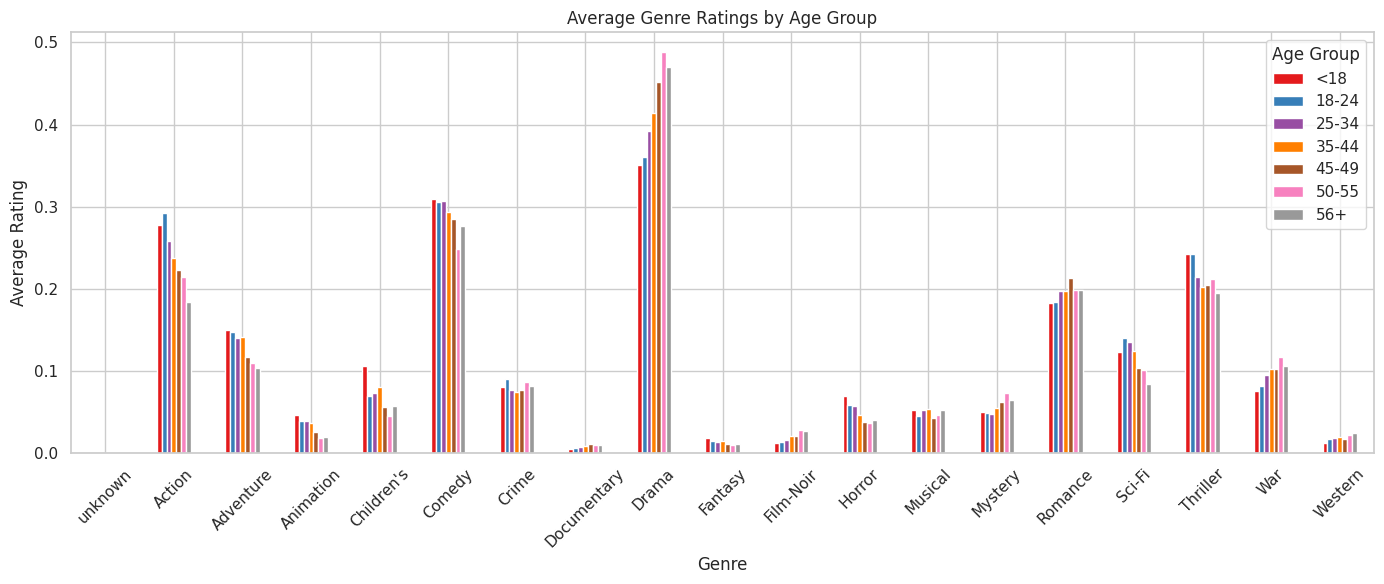

In [53]:
#Grouping by age_group and calculating average genre ratings
avg_rating_by_age = full_df.groupby('age_group')[genre_cols].mean().T

plt.figure(figsize=(14, 6))
avg_rating_by_age.plot(kind='bar', figsize=(14, 6), colormap='Set1')
plt.title('Average Genre Ratings by Age Group')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


In [54]:
#Convert timestamp to datetime
full_df['date'] = pd.to_datetime(full_df['timestamp'], unit='s')
full_df['year'] = full_df['date'].dt.year


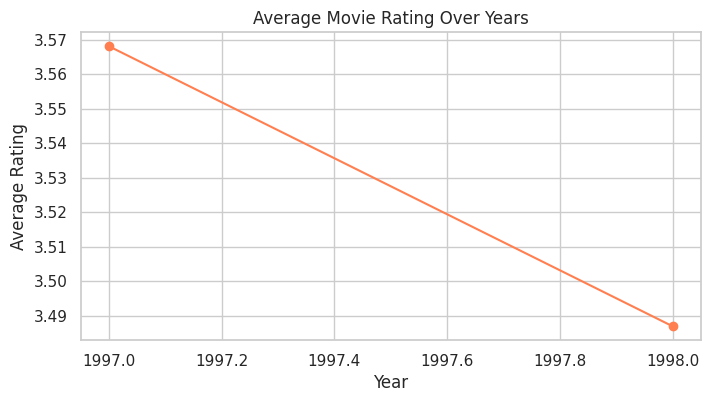

In [55]:
#Group by year and calculate average rating
avg_rating_by_year = full_df.groupby('year')['rating'].mean()

plt.figure(figsize=(8, 4))
avg_rating_by_year.plot(marker='o', linestyle='-', color='coral')
plt.title('Average Movie Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


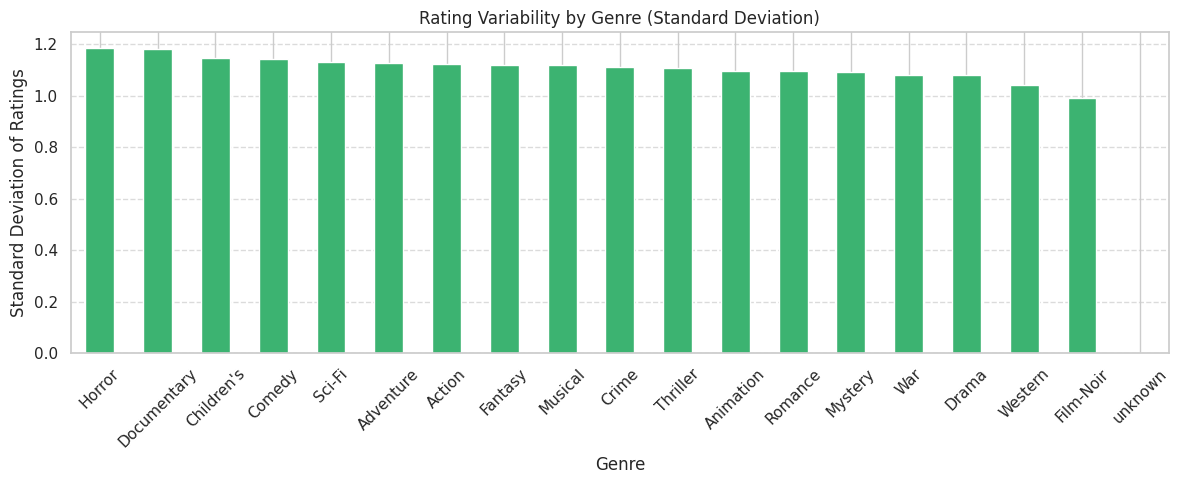

In [57]:
###Which genres have more rating variability than others?

genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

#Calculating standard deviation of ratings for each genre
genre_rating_std = {}

for genre in genre_cols:
    genre_ratings = full_df[full_df[genre] == 1]['rating']
    genre_rating_std[genre] = genre_ratings.std()


import pandas as pd
genre_std_df = pd.Series(genre_rating_std).sort_values(ascending=False)

plt.figure(figsize=(12, 5))
genre_std_df.plot(kind='bar', color='mediumseagreen')
plt.title('Rating Variability by Genre (Standard Deviation)')
plt.ylabel('Standard Deviation of Ratings')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: ylabel='title'>

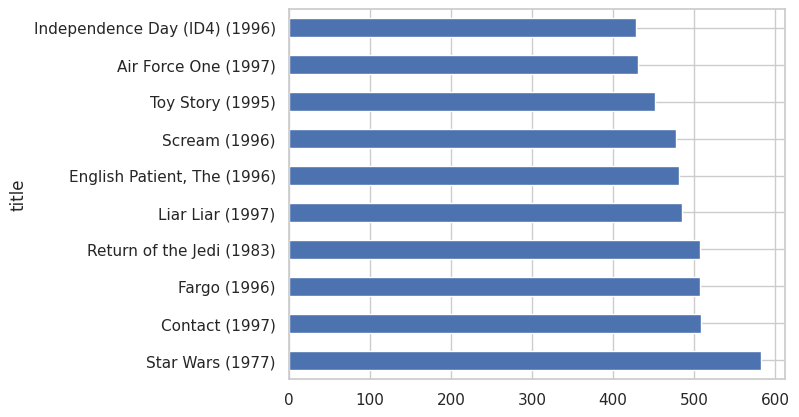

In [58]:
top_rated = full_df['title'].value_counts().head(10)
top_rated.plot(kind='barh')


In [62]:
#Simple movie recommender based on genre
def recommend_movies(genre, n=5):
    return full_df[full_df[genre] == 1].sort_values(by="rating", ascending=False)[['title', 'rating']].drop_duplicates().head(n)

recommend_movies('Action')


,title,rating
84,Die Hard (1988),5
105,Conspiracy Theory (1997),5
12,Star Trek: First Contact (1996),5
108,Raiders of the Lost Ark (1981),5
99942,Return of the Jedi (1983),5


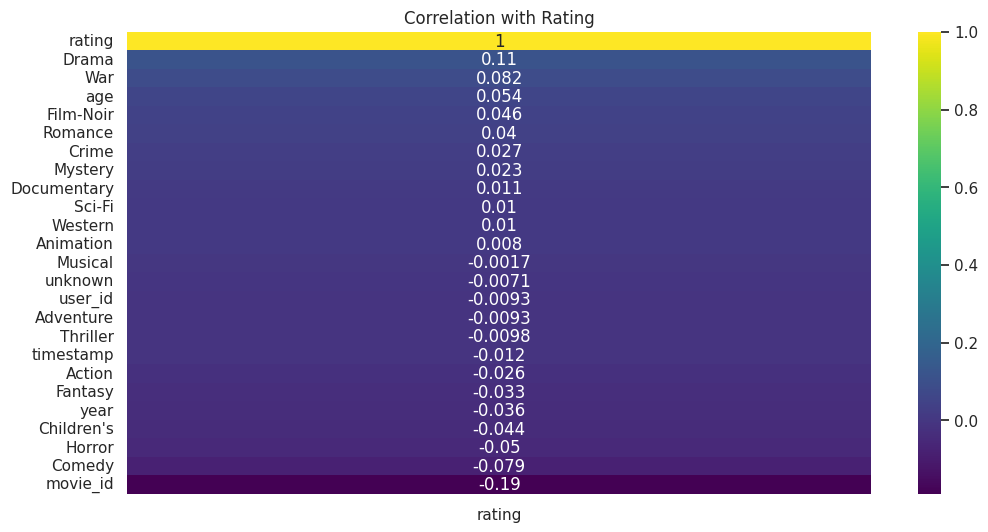

In [63]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(full_df.corr(numeric_only=True)[['rating']].sort_values('rating', ascending=False), annot=True, cmap='viridis')
plt.title("Correlation with Rating")
plt.show()


#### CONCLUSION :-- ####

In this project, we performed a comprehensive analysis of the MovieLens 100K dataset to understand user preferences, movie ratings, and genre-wise trends. We began by cleaning and merging data from different files, followed by detailed exploratory data analysis (EDA) to uncover valuable insights.

##Key Takeaways:
Average movie ratings tend to fall between 3 and 4, with very few extreme ratings.

Drama, Romance, and Action are the most common genres, while genres like Film-Noir and Western are less frequent.

Genre-based trends show that some genres (like Film-Noir, War) tend to receive higher average ratings.

We analyzed rating variability across genres to see which ones have more consistent or more polarizing feedback.

A simple genre-based recommender function was created to recommend top-rated movies from any selected genre.

##Concepts Applied:
Data cleaning and merging

Descriptive statistics and summary metrics

Visualizations (histograms, boxplots, heatmaps)

Grouping and aggregations

Data filtering and sorting

Function building for recommendations